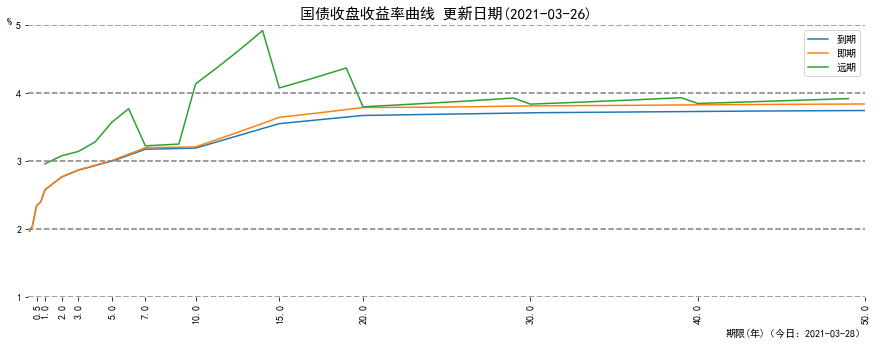

In [2]:
import requests
import json
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from matplotlib.pyplot import MultipleLocator

plt.rcParams['font.sans-serif']=['SimHei']      
plt.rcParams['axes.unicode_minus'] = False

#获取今日往前的n天的日期字符串
def getBeforeDay(n): 
    beforeDay = datetime.date.today() + datetime.timedelta(-n)
    return beforeDay.strftime('%Y-%m-%d')

now = time.time()
local_time = time.localtime(now)
today = time.strftime('%Y-%m-%d', local_time)

date = today
existData = False
count = 0
x = []
y = []

while existData is False:
    if count > 10:  #节假日不开盘 最多也不超过10天吧
        break 

    date = getBeforeDay(count)
    count = count + 1

    url = "http://www.chinamoney.com.cn/ags/ms/cm-u-bk-currency/ClsYldCurvXml?lang=CN&bondType=CYCC000&interestRateDate="+date+"&maturityYield=1&currentYield=1&futureYield=1"

    res = requests.get(url)
    data = json.loads(res.text)

    xmlStr = data['data']['dataXml']
    soup = BeautifulSoup(xmlStr, "lxml")

    n_xticks = []
    showValues = soup.find_all('value', attrs={'show':'true'})          
    for showValue in showValues:
        n_xticks.append(float(showValue.text))

    
    # xaxis = soup.find('xaxis')
    # xValues = xaxis.find_all('value')
    # for xValue in xValues:
    #     if xValue.get('show') == 'true':
    #         n_xticks.append(float(xValue.text))
    #     if xValue.get('xid') != '0':
    #         x.append(float(xValue.text))

    # if len(x) != 0:
    #     graph = soup.find('graph')
    #     yValues = graph.find_all('value')
    #     for yValue in yValues:
    #         y.append(float(yValue.text))

    xaxis = soup.find('xaxis')
    xValues = xaxis.find_all('value')

    graphs = soup.find_all('graph')
    for graph in graphs:
        yValues = graph.find_all('value')
        x0 = []
        y0 = []
        for yValue in yValues:
            y0.append(float(yValue.text))    
            for xValue in xValues:
                if xValue.get('xid') == yValue.get('xid'):
                    x0.append(float(xValue.text)) 
        x.append(x0)                   
        y.append(y0)    
        
        existData = True


fig=plt.figure(figsize=(15,5))

plt.plot(x[0],y[0],label="到期")    
plt.plot(x[1],y[1],label="即期")    
plt.plot(x[2],y[2],label="远期")    

plt.plot([0,50.0],[1.00,1.00],color="grey",linestyle="--")     
plt.plot([0,50.0],[2.00,2.00],color="grey",linestyle="--")     
plt.plot([0,50.0],[3.00,3.00],color="grey",linestyle="--")     
plt.plot([0,50.0],[4.0,4.0],color="grey",linestyle="--")     
plt.plot([0,50.0],[5.0,5.0],color="grey",linestyle="--")     

plt.title("国债收盘收益率曲线 更新日期("+date+")",fontsize=15)
plt.xlabel("期限(年)（今日："+today+"）", loc = "right")
plt.ylabel("%", loc = "top", rotation = 0)

ax = plt.gca()
ax.spines['left'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_color('none')

plt.xlim(0,50)
plt.ylim(1,5)
plt.xticks(n_xticks,rotation=90)

y_major_locator=MultipleLocator(1.00)
ax=plt.gca()
ax.yaxis.set_major_locator(y_major_locator)

plt.legend()


plt.show()